In [1]:
#!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [2]:
#!gdown https://drive.google.com/uc?id=12FIGFL_-WnKTTOo8AC_eh3O1VNzvDeQP

Downloading...
From: https://drive.google.com/uc?id=12FIGFL_-WnKTTOo8AC_eh3O1VNzvDeQP
To: /content/MaskDatasets.zip
100% 216M/216M [00:00<00:00, 248MB/s]


In [3]:
#!unzip ../content/MaskDatasets.zip

Archive:  ../content/MaskDatasets.zip
   creating: MaskDatasets/
   creating: MaskDatasets/Test/
   creating: MaskDatasets/Test/Mask/
  inflating: MaskDatasets/Test/Mask/2070.jpg  
  inflating: MaskDatasets/Test/Mask/2072.jpg  
  inflating: MaskDatasets/Test/Mask/2083.jpg  
  inflating: MaskDatasets/Test/Mask/2085.jpg  
  inflating: MaskDatasets/Test/Mask/2086.jpg  
  inflating: MaskDatasets/Test/Mask/2110.jpg  
  inflating: MaskDatasets/Test/Mask/2113.jpg  
  inflating: MaskDatasets/Test/Mask/2114.jpeg  
  inflating: MaskDatasets/Test/Mask/2130.jpg  
  inflating: MaskDatasets/Test/Mask/2132.jpg  
  inflating: MaskDatasets/Test/Mask/2135.jpg  
  inflating: MaskDatasets/Test/Mask/2154.png  
  inflating: MaskDatasets/Test/Mask/2158.png  
  inflating: MaskDatasets/Test/Mask/2159.png  
  inflating: MaskDatasets/Test/Mask/2160.png  
  inflating: MaskDatasets/Test/Mask/2170.png  
  inflating: MaskDatasets/Test/Mask/2172.png  
  inflating: MaskDatasets/Test/Mask/2173.png  
  inflating: MaskDa

In [4]:
import os

data_root = '/content/MaskDatasets'
data_root

'/content/MaskDatasets'

In [5]:
train_dir = os.path.join(data_root, 'Train')
val_dir = os.path.join(data_root, 'Validation')

In [6]:
train_mask_fname = os.listdir(os.path.join(train_dir,'Mask'))
train_nomask_fname = os.listdir(os.path.join(train_dir,'NoMask'))

print('mask', len(train_mask_fname))
print('nomaks', len(train_nomask_fname))

mask 300
nomaks 300


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import PIL
from PIL import Image

In [8]:
x_train = []
y_train = []

for i in range(len(train_mask_fname)):
  f = os.path.join(train_dir, 'Mask', train_mask_fname[i])
  image = PIL.Image.open(f)
  image = image.resize((224,224))
  arr = np.array(image)
  x_train.append(arr)
  y_train.append(1)

In [9]:
for i in range(len(train_nomask_fname)):
  f = os.path.join(train_dir, 'NoMask', train_nomask_fname[i])
  image = PIL.Image.open(f)
  image = image.resize((224,224))
  arr = np.array(image)
  x_train.append(arr)
  y_train.append(0)

In [10]:
val_mask_fname = os.listdir(os.path.join(val_dir,'Mask'))
val_nomask_fname = os.listdir(os.path.join(val_dir,'NoMask'))

x_val = []
y_val = []


for i in range(len(val_mask_fname)):
  f = os.path.join(val_dir, 'Mask', val_mask_fname[i])
  image = PIL.Image.open(f)
  image = image.resize((224,224))
  arr = np.array(image)
  x_val.append(arr)
  y_val.append(1)

for i in range(len(val_nomask_fname)):
  f = os.path.join(val_dir, 'NoMask', val_nomask_fname[i])
  image = PIL.Image.open(f)
  image = image.resize((224,224))
  arr = np.array(image)
  x_val.append(arr)
  y_val.append(0)  

In [11]:
x_train = np.array(x_train)
y_train = np.array(y_train)

x_val = np.array(x_val)
y_val = np.array(y_val)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(600, 224, 224, 3) (600,)
(306, 224, 224, 3) (306,)


In [12]:
from sklearn.model_selection import train_test_split

x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size = 0.3, shuffle = True)
print(x_val.shape, y_val.shape)

(214, 224, 224, 3) (214,)


In [13]:
x_train = x_train.astype('float32')/255.
x_val = x_val.astype('float32')/255.
x_test = x_test.astype('float32')/255.

In [14]:
model = keras.Sequential([
    layers.Conv2D(16,3, activation = 'relu', input_shape = (224,224,3)),
    layers.MaxPooling2D(2),
    layers.BatchNormalization(),
    layers.Conv2D(32,3, activation = 'relu'),
    layers.MaxPooling2D(2),
    layers.BatchNormalization(),
    layers.Conv2D(64,3, activation = 'relu'),
    layers.MaxPooling2D(2),
    layers.BatchNormalization(),
    layers.Conv2D(128,3, activation = 'relu'),
    layers.MaxPooling2D(2),
    layers.BatchNormalization(),
    layers.Conv2D(256,3, activation = 'relu'),
    layers.MaxPooling2D(2),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.BatchNormalization(),

    layers.Dense(units = 128, activation = 'relu'),
    layers.Dense(units = 64, activation = 'relu'),
    layers.Dense(units = 16, activation = 'relu'),
    layers.Dense(units = 10, activation = 'relu'),
    layers.Dense(units = 1, activation = 'sigmoid')

])

model.compile(
    optimizer = 'sgd',
    loss = 'binary_crossentropy',
    metrics = ['acc']
)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 111, 111, 16)     64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                        

In [16]:
from tensorflow.keras import callbacks

es_callbacks = callbacks.EarlyStopping(
    monitor = 'val_loss',
    patience = 10
)

In [17]:
from tensorflow.keras import callbacks

ckpt_path = 'mask.ckpt'
ckpt_callback = callbacks.ModelCheckpoint(
    ckpt_path,
    monitor = 'val_loss',
    save_weight_only = True,
    save_best_only = True,
    verbose = 1
)

In [18]:
%%time

EPOCHS = 50
BATCH_SIZE = 32

log = model.fit(x_train, y_train,
                epochs = EPOCHS,
                batch_size = BATCH_SIZE,
                validation_data = (x_val, y_val),
                callbacks = [ckpt_callback],
                verbose = 1)

Epoch 1/50
19/19 [==============================] - ETA: 0s - loss: 0.4414 - acc: 0.8033
Epoch 1: val_loss improved from inf to 0.69056, saving model to mask.ckpt


19/19 [==============================] - 14s 234ms/step - loss: 0.4414 - acc: 0.8033 - val_loss: 0.6906 - val_acc: 0.6168
Epoch 2/50
19/19 [==============================] - ETA: 0s - loss: 0.2079 - acc: 0.9283
Epoch 2: val_loss improved from 0.69056 to 0.68804, saving model to mask.ckpt


19/19 [==============================] - 3s 162ms/step - loss: 0.2079 - acc: 0.9283 - val_loss: 0.6880 - val_acc: 0.5140
Epoch 3/50
19/19 [==============================] - ETA: 0s - loss: 0.1368 - acc: 0.9517
Epoch 3: val_loss improved from 0.68804 to 0.68510, saving model to mask.ckpt


19/19 [==============================] - 3s 178ms/step - loss: 0.1368 - acc: 0.9517 - val_loss: 0.6851 - val_acc: 0.4953
Epoch 4/50
19/19 [==============================] - ETA: 0s - loss: 0.1010 - acc: 0.9767
Epoch 4: val_loss improved from 0.68510 to 0.67833, saving model to mask.ckpt


19/19 [==============================] - 3s 163ms/step - loss: 0.1010 - acc: 0.9767 - val_loss: 0.6783 - val_acc: 0.6822
Epoch 5/50
19/19 [==============================] - ETA: 0s - loss: 0.0816 - acc: 0.9750
Epoch 5: val_loss did not improve from 0.67833
19/19 [==============================] - 1s 43ms/step - loss: 0.0816 - acc: 0.9750 - val_loss: 0.6940 - val_acc: 0.4953
Epoch 6/50
19/19 [==============================] - ETA: 0s - loss: 0.0428 - acc: 0.9950
Epoch 6: val_loss improved from 0.67833 to 0.65388, saving model to mask.ckpt


19/19 [==============================] - 3s 172ms/step - loss: 0.0428 - acc: 0.9950 - val_loss: 0.6539 - val_acc: 0.6215
Epoch 7/50
19/19 [==============================] - ETA: 0s - loss: 0.0273 - acc: 1.0000
Epoch 7: val_loss improved from 0.65388 to 0.64486, saving model to mask.ckpt


19/19 [==============================] - 3s 168ms/step - loss: 0.0273 - acc: 1.0000 - val_loss: 0.6449 - val_acc: 0.5748
Epoch 8/50
19/19 [==============================] - ETA: 0s - loss: 0.0243 - acc: 0.9983
Epoch 8: val_loss improved from 0.64486 to 0.62956, saving model to mask.ckpt


19/19 [==============================] - 3s 172ms/step - loss: 0.0243 - acc: 0.9983 - val_loss: 0.6296 - val_acc: 0.6495
Epoch 9/50
19/19 [==============================] - ETA: 0s - loss: 0.0186 - acc: 1.0000
Epoch 9: val_loss improved from 0.62956 to 0.60606, saving model to mask.ckpt


19/19 [==============================] - 3s 162ms/step - loss: 0.0186 - acc: 1.0000 - val_loss: 0.6061 - val_acc: 0.6589
Epoch 10/50
19/19 [==============================] - ETA: 0s - loss: 0.0145 - acc: 1.0000
Epoch 10: val_loss improved from 0.60606 to 0.55892, saving model to mask.ckpt


19/19 [==============================] - 3s 162ms/step - loss: 0.0145 - acc: 1.0000 - val_loss: 0.5589 - val_acc: 0.7243
Epoch 11/50
19/19 [==============================] - ETA: 0s - loss: 0.0116 - acc: 1.0000
Epoch 11: val_loss did not improve from 0.55892
19/19 [==============================] - 1s 43ms/step - loss: 0.0116 - acc: 1.0000 - val_loss: 0.6400 - val_acc: 0.6449
Epoch 12/50
19/19 [==============================] - ETA: 0s - loss: 0.0100 - acc: 1.0000
Epoch 12: val_loss did not improve from 0.55892
19/19 [==============================] - 1s 39ms/step - loss: 0.0100 - acc: 1.0000 - val_loss: 0.7395 - val_acc: 0.6075
Epoch 13/50
19/19 [==============================] - ETA: 0s - loss: 0.0083 - acc: 1.0000
Epoch 13: val_loss did not improve from 0.55892
19/19 [==============================] - 1s 39ms/step - loss: 0.0083 - acc: 1.0000 - val_loss: 0.6509 - val_acc: 0.6495
Epoch 14/50
19/19 [==============================] - ETA: 0s - loss: 0.0071 - acc: 1.0000
Epoch 14: val_l

19/19 [==============================] - 3s 180ms/step - loss: 0.0101 - acc: 1.0000 - val_loss: 0.4990 - val_acc: 0.7523
Epoch 18/50
19/19 [==============================] - ETA: 0s - loss: 0.0067 - acc: 1.0000
Epoch 18: val_loss did not improve from 0.49900
19/19 [==============================] - 1s 42ms/step - loss: 0.0067 - acc: 1.0000 - val_loss: 0.5774 - val_acc: 0.7617
Epoch 19/50
19/19 [==============================] - ETA: 0s - loss: 0.0045 - acc: 1.0000
Epoch 19: val_loss did not improve from 0.49900
19/19 [==============================] - 1s 39ms/step - loss: 0.0045 - acc: 1.0000 - val_loss: 0.6143 - val_acc: 0.7617
Epoch 20/50
19/19 [==============================] - ETA: 0s - loss: 0.0053 - acc: 1.0000
Epoch 20: val_loss did not improve from 0.49900
19/19 [==============================] - 1s 40ms/step - loss: 0.0053 - acc: 1.0000 - val_loss: 0.7211 - val_acc: 0.7757
Epoch 21/50
19/19 [==============================] - ETA: 0s - loss: 0.0037 - acc: 1.0000
Epoch 21: val_l

19/19 [==============================] - 3s 170ms/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.4934 - val_acc: 0.8551
Epoch 28/50
19/19 [==============================] - ETA: 0s - loss: 0.0025 - acc: 1.0000
Epoch 28: val_loss improved from 0.49340 to 0.44753, saving model to mask.ckpt


19/19 [==============================] - 3s 161ms/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.4475 - val_acc: 0.8785
Epoch 29/50
19/19 [==============================] - ETA: 0s - loss: 0.0023 - acc: 1.0000
Epoch 29: val_loss improved from 0.44753 to 0.40665, saving model to mask.ckpt


19/19 [==============================] - 3s 175ms/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.4067 - val_acc: 0.8785
Epoch 30/50
19/19 [==============================] - ETA: 0s - loss: 0.0024 - acc: 1.0000
Epoch 30: val_loss improved from 0.40665 to 0.38396, saving model to mask.ckpt


19/19 [==============================] - 3s 162ms/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.3840 - val_acc: 0.8879
Epoch 31/50
19/19 [==============================] - ETA: 0s - loss: 0.0019 - acc: 1.0000
Epoch 31: val_loss did not improve from 0.38396
19/19 [==============================] - 1s 42ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.3887 - val_acc: 0.8879
Epoch 32/50
19/19 [==============================] - ETA: 0s - loss: 0.0134 - acc: 0.9950
Epoch 32: val_loss did not improve from 0.38396
19/19 [==============================] - 1s 40ms/step - loss: 0.0134 - acc: 0.9950 - val_loss: 0.4091 - val_acc: 0.8551
Epoch 33/50
19/19 [==============================] - ETA: 0s - loss: 0.0029 - acc: 1.0000
Epoch 33: val_loss improved from 0.38396 to 0.33983, saving model to mask.ckpt


19/19 [==============================] - 3s 171ms/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.3398 - val_acc: 0.8879
Epoch 34/50
19/19 [==============================] - ETA: 0s - loss: 0.0031 - acc: 1.0000
Epoch 34: val_loss did not improve from 0.33983
19/19 [==============================] - 1s 42ms/step - loss: 0.0031 - acc: 1.0000 - val_loss: 0.3584 - val_acc: 0.8879
Epoch 35/50
19/19 [==============================] - ETA: 0s - loss: 0.0031 - acc: 1.0000
Epoch 35: val_loss improved from 0.33983 to 0.33407, saving model to mask.ckpt


19/19 [==============================] - 3s 157ms/step - loss: 0.0031 - acc: 1.0000 - val_loss: 0.3341 - val_acc: 0.8879
Epoch 36/50
19/19 [==============================] - ETA: 0s - loss: 0.0019 - acc: 1.0000
Epoch 36: val_loss did not improve from 0.33407
19/19 [==============================] - 1s 43ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.3468 - val_acc: 0.8879
Epoch 37/50
19/19 [==============================] - ETA: 0s - loss: 0.0022 - acc: 1.0000
Epoch 37: val_loss did not improve from 0.33407
19/19 [==============================] - 1s 40ms/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.3489 - val_acc: 0.8879
Epoch 38/50
19/19 [==============================] - ETA: 0s - loss: 0.0015 - acc: 1.0000
Epoch 38: val_loss did not improve from 0.33407
19/19 [==============================] - 1s 39ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.3391 - val_acc: 0.8925
Epoch 39/50
19/19 [==============================] - ETA: 0s - loss: 0.0015 - acc: 1.0000
Epoch 39: val_l

19/19 [==============================] - 3s 174ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.3301 - val_acc: 0.8925
Epoch 47/50
19/19 [==============================] - ETA: 0s - loss: 0.0032 - acc: 0.9983
Epoch 47: val_loss did not improve from 0.33009
19/19 [==============================] - 1s 42ms/step - loss: 0.0032 - acc: 0.9983 - val_loss: 0.5566 - val_acc: 0.8364
Epoch 48/50
19/19 [==============================] - ETA: 0s - loss: 0.0038 - acc: 1.0000
Epoch 48: val_loss did not improve from 0.33009
19/19 [==============================] - 1s 39ms/step - loss: 0.0038 - acc: 1.0000 - val_loss: 0.3434 - val_acc: 0.8972
Epoch 49/50
19/19 [==============================] - ETA: 0s - loss: 0.0017 - acc: 1.0000
Epoch 49: val_loss did not improve from 0.33009
19/19 [==============================] - 1s 40ms/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.3446 - val_acc: 0.9019
Epoch 50/50
19/19 [==============================] - ETA: 0s - loss: 0.0015 - acc: 1.0000
Epoch 50: val_l

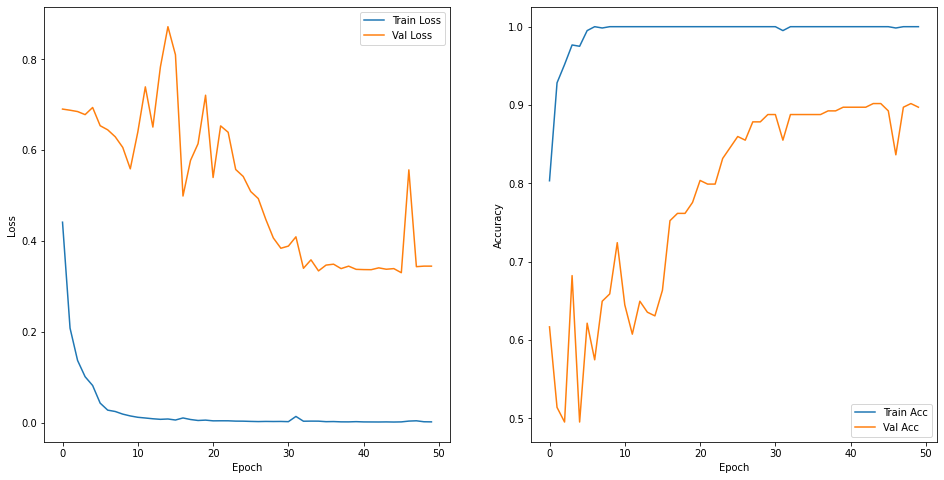

In [19]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'],label='Train Acc')
    plt.plot(hist['epoch'], hist['val_acc'],label = 'Val Acc')

    plt.legend()
    plt.show()

plot_history(log) # 그래프가 벌어지면 과적합현상이 생기기 시작한것.

In [20]:
model.load_weights(ckpt_path)

In [21]:
model.evaluate(x_test, y_test)

3/3 [==============================] - 0s 114ms/step - loss: 0.1968 - acc: 0.9239


[0.19681592285633087, 0.9239130616188049]

In [22]:
y_pred = model.predict(x_test)

3/3 [==============================] - 0s 10ms/step


In [23]:
y_pred = (y_pred > 0.5).astype('int')

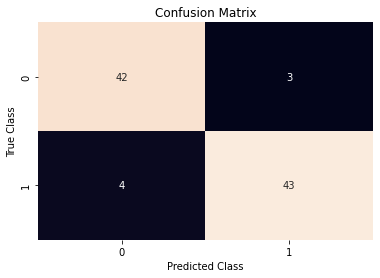

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred):
    cfm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cfm, annot = True, cbar = False, linecolor='white')
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, y_pred.flatten())